In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Change directory
%cd 'drive/My Drive/results/synthetic_regul/'

/content/drive/My Drive/results/synthetic_regul


In [3]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

     \ 47.4 MB 903 kB/s
  Created wheel for gradient-correction: filename=gradient_correction-0.1-py3-none-any.whl size=10713 sha256=369d6b78e55ceb98608efad8012fc3b2f2741455e345a3c06e02cf354eccf8a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-2cxwwm8m/wheels/03/4c/0a/9516d8fa386ed9a21d1aa50e8cc5b1f6d6f576195897b24409
Successfully built gradient-correction


In [4]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [5]:
import pickle

reg_factors = [2e-2, 1e-2, 3e-3, 1e-3, 1e-4, 2e-5, 1e-5, 1e-6, 1e-7]
file_cnn_deep_relu = {}
file_cnn_deep_exp = {}
file_cnn_shallow_relu = {}
file_cnn_shallow_exp = {}

for reg_factor in reg_factors: 
    file_cnn_deep_relu[reg_factor] = open("cnn_deep_relu_"+str(reg_factor)+"_results.pickle", "rb")
    file_cnn_deep_exp[reg_factor] = open("cnn_deep_exponential_"+str(reg_factor)+"_results.pickle", "rb")
    file_cnn_shallow_relu[reg_factor] = open("cnn_shallow_relu_"+str(reg_factor)+"_results.pickle", "rb")
    file_cnn_shallow_exp[reg_factor] = open("cnn_shallow_exponential_"+str(reg_factor)+"_results.pickle", "rb")

In [6]:
results={}
results['deep_relu'] = {}
results['deep_exp'] = {}
results['shallow_relu'] = {}
results['shallow_exp'] = {}

for reg_factor in reg_factors:
    results['deep_relu'][reg_factor] = pickle.load(file_cnn_deep_relu[reg_factor])
    results['deep_exp'][reg_factor] = pickle.load(file_cnn_deep_exp[reg_factor])
    results['shallow_relu'][reg_factor] = pickle.load(file_cnn_shallow_relu[reg_factor])
    results['shallow_exp'][reg_factor] = pickle.load(file_cnn_shallow_exp[reg_factor])

In [7]:
Performance={}

Performance['deep_relu'] = []
Performance['deep_exp'] = []
Performance['shallow_relu'] = []
Performance['shallow_exp'] = []

for reg_factor in reg_factors:
    Performance['deep_relu'].append (  np.array(results['deep_relu'][reg_factor]['auc'])  )
    Performance['deep_exp'].append ( np.array(results['deep_exp'][reg_factor]['auc'])  )
    Performance['shallow_relu'].append ( np.array(results['shallow_relu'][reg_factor]['auc'])  )
    Performance['shallow_exp'].append ( np.array(results['shallow_exp'][reg_factor]['auc'])   )
   

In [8]:
Cosine={}
Angles_std={}
Cosine['deep_relu']=[]
Cosine['deep_exp']=[]
Cosine['shallow_relu']=[]
Cosine['shallow_exp']=[]
Angles_std['deep_relu']=[]
Angles_std['deep_exp']=[]
Angles_std['shallow_relu']=[]
Angles_std['shallow_exp']=[]

for reg_factor in reg_factors:
    Cosine['deep_relu'].append ( np.array(results['deep_relu'][reg_factor]['saliency']['cos_dist']) )
    Cosine['deep_exp'].append ( np.array(results['deep_exp'][reg_factor]['saliency']['cos_dist']) )
    Cosine['shallow_relu'].append ( np.array(results['shallow_relu'][reg_factor]['saliency']['cos_dist']) )
    Cosine['shallow_exp'].append ( np.array(results['shallow_exp'][reg_factor]['saliency']['cos_dist']) )

    Angles_std['deep_relu'].append ( np.array(results['deep_relu'][reg_factor]['saliency']['angles_std']) )
    Angles_std['deep_exp'].append ( np.array(results['deep_exp'][reg_factor]['saliency']['angles_std']) )
    Angles_std['shallow_relu'].append ( np.array(results['shallow_relu'][reg_factor]['saliency']['angles_std']) )
    Angles_std['shallow_exp'].append ( np.array(results['shallow_exp'][reg_factor]['saliency']['angles_std']) )


# CNN-deep-relu

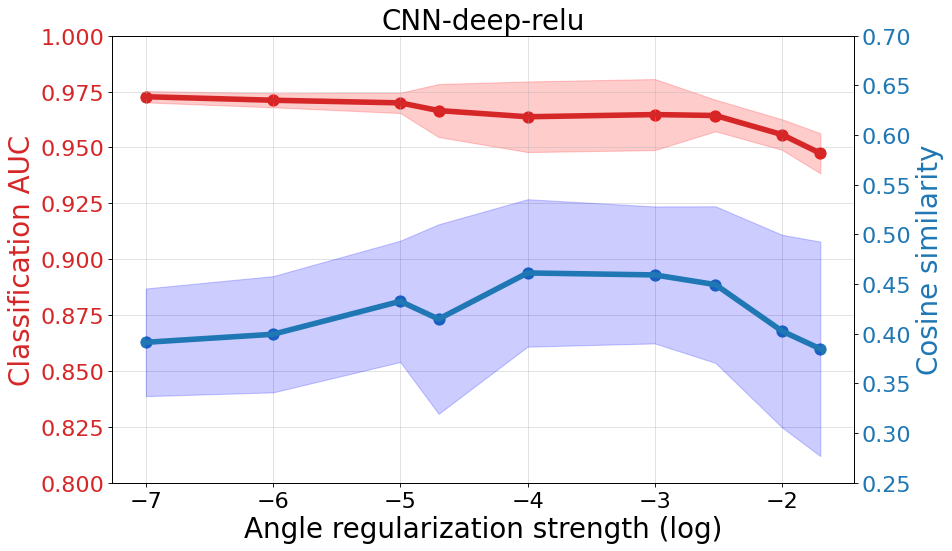

In [9]:
experiment_name='CNN-deep-relu'
log_reg = np.log10(reg_factors)
Performance_graph =np.nanmean(Performance['deep_relu'],axis=-1)   #Performance
Cosine_graph = np.nanmean(Cosine['deep_relu'],axis=-1) #Cosine
Performance_std_graph = np.nanstd(Performance['deep_relu'],axis=-1) #Performance std
Cosine_std_graph = np.nanstd(Cosine['deep_relu'],axis=-1) #Cosine std

plotter.plot_regularization(experiment_name, log_reg, Performance_graph, Cosine_graph, Performance_std_graph, Cosine_std_graph, y1_min=0.8, y1_max=1, y2_min=0.25, y2_max=0.7, labelsize=20, fontsize=25)

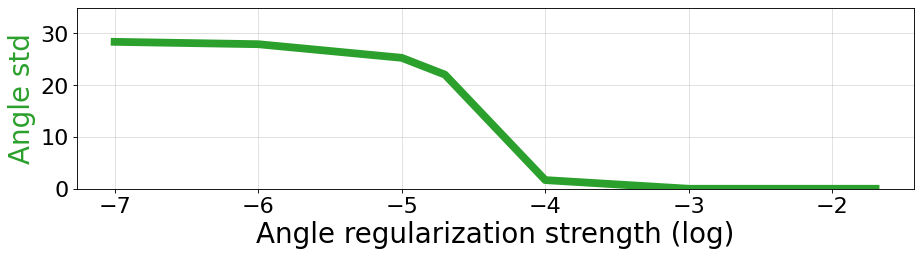

In [11]:
log_reg = np.log10(reg_factors)
Angles_std_graph = np.nanmean(Angles_std['deep_relu'],axis=-1) 
plotter.plot_regularization_angles(log_reg, Angles_std_graph, y_min=0, y_max=35, labelsize=20, fontsize=25)

# CNN-shallow-relu

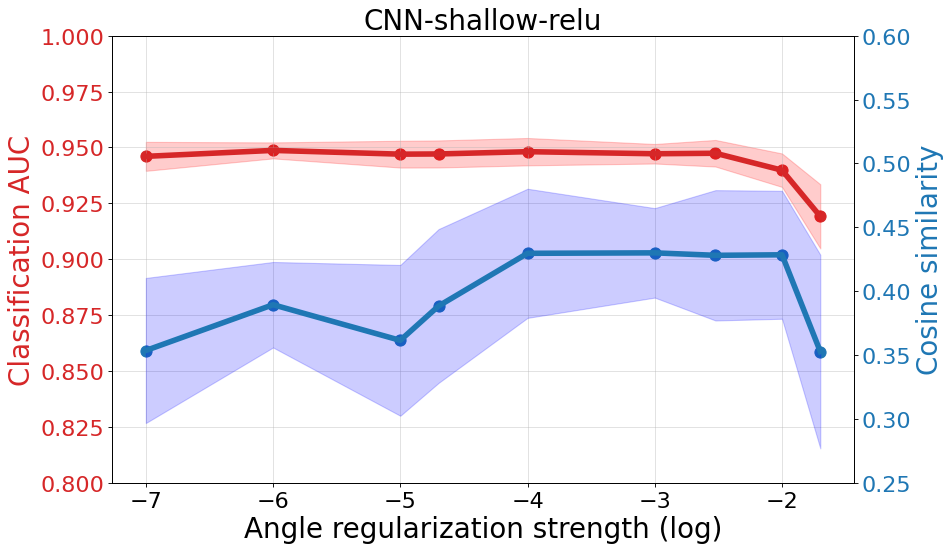

In [12]:
experiment_name='CNN-shallow-relu'
log_reg = np.log10(reg_factors)
Performance_graph =np.nanmean(Performance['shallow_relu'],axis=-1)   #Performance
Cosine_graph = np.nanmean(Cosine['shallow_relu'],axis=-1) #Cosine
Performance_std_graph = np.nanstd(Performance['shallow_relu'],axis=-1) #Performance std
Cosine_std_graph = np.nanstd(Cosine['shallow_relu'],axis=-1) #Cosine std

plotter.plot_regularization(experiment_name, log_reg, Performance_graph, Cosine_graph, Performance_std_graph, Cosine_std_graph, y1_min=0.8, y1_max=1, y2_min=0.25, y2_max=0.6, labelsize=20, fontsize=25)

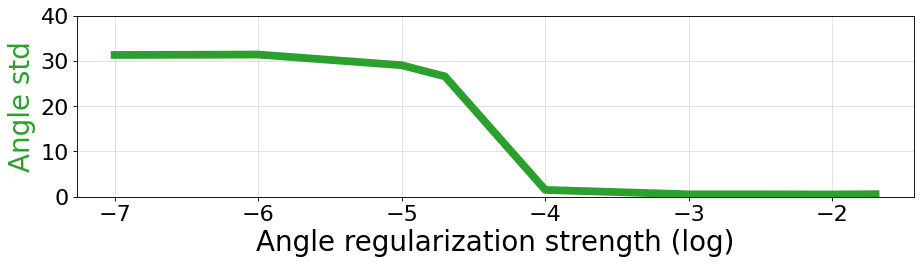

In [13]:
log_reg = np.log10(reg_factors)
Angles_std_graph = np.nanmean(Angles_std['shallow_relu'],axis=-1) 
plotter.plot_regularization_angles(log_reg, Angles_std_graph, y_min=0, y_max=40, labelsize=20, fontsize=25)

# CNN-deep-exp

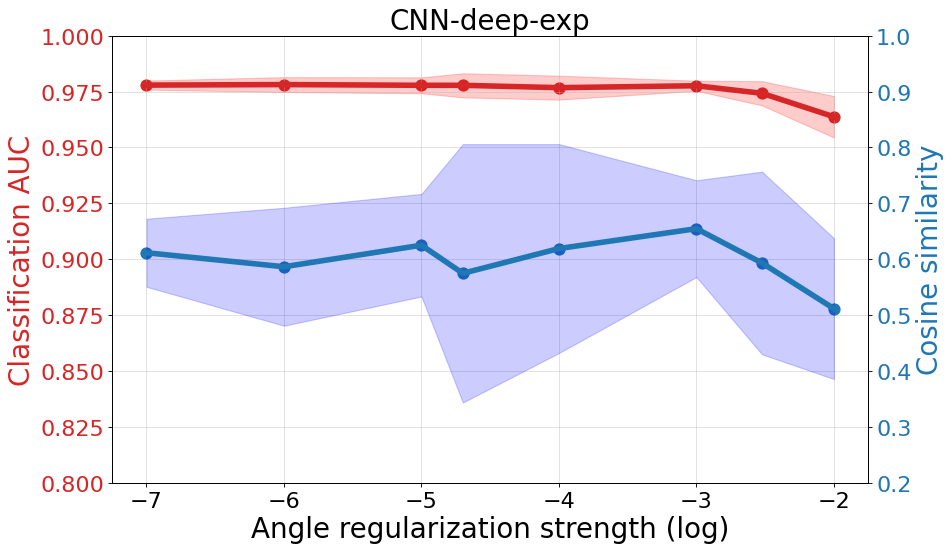

In [20]:
experiment_name='CNN-deep-exp'
log_reg = np.log10(reg_factors)
Performance_graph =np.nanmean(Performance['deep_exp'],axis=-1)   #Performance
Cosine_graph = np.nanmean(Cosine['deep_exp'],axis=-1) #Cosine
Performance_std_graph = np.nanstd(Performance['deep_exp'],axis=-1) #Performance std
Cosine_std_graph = np.nanstd(Cosine['deep_exp'],axis=-1) #Cosine std

#Clip extreme overregularized values
log_reg = log_reg[1:]
Performance_graph =Performance_graph[1:]
Cosine_graph = Cosine_graph[1:]
Performance_std_graph = Performance_std_graph[1:]
Cosine_std_graph = Cosine_std_graph[1:]
plotter.plot_regularization(experiment_name, log_reg, Performance_graph, Cosine_graph, Performance_std_graph, Cosine_std_graph, y1_min=0.8, y1_max=1, y2_min=0.2, y2_max=1, labelsize=20, fontsize=25)

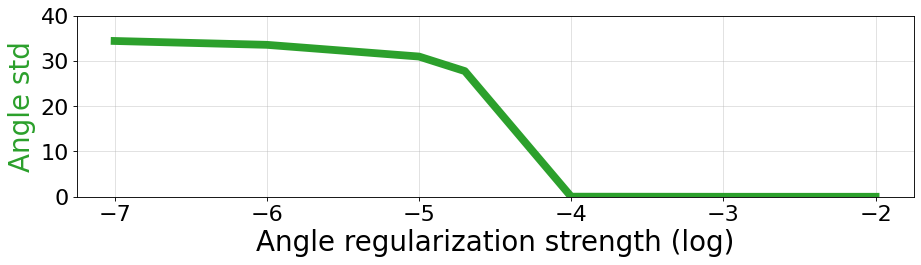

In [21]:
log_reg = np.log10(reg_factors)
Angles_std_graph = np.nanmean(Angles_std['deep_exp'],axis=-1) 
#Clip extreme overregularized values
log_reg = log_reg[1:]
Angles_std_graph = Angles_std_graph[1:]
plotter.plot_regularization_angles(log_reg, Angles_std_graph, y_min=0, y_max=40, labelsize=20, fontsize=25)

# CNN-shallow-exp

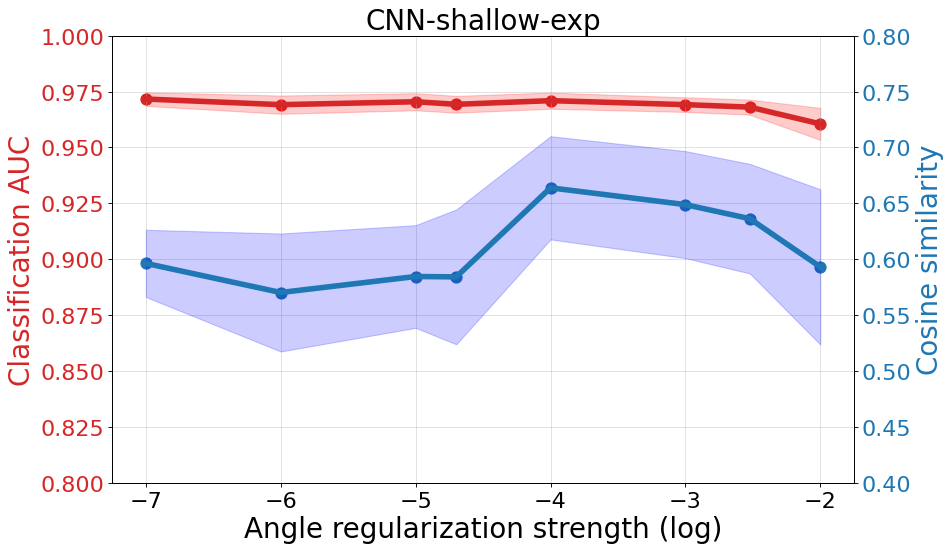

In [16]:
experiment_name='CNN-shallow-exp'
log_reg = np.log10(reg_factors)
Performance_graph =np.nanmean(Performance['shallow_exp'],axis=-1)   #Performance
Cosine_graph = np.nanmean(Cosine['shallow_exp'],axis=-1) #Cosine
Performance_std_graph = np.nanstd(Performance['shallow_exp'],axis=-1) #Performance std
Cosine_std_graph = np.nanstd(Cosine['shallow_exp'],axis=-1) #Cosine std

#Clip extreme overregularized values
log_reg = log_reg[1:]
Performance_graph =Performance_graph[1:]
Cosine_graph = Cosine_graph[1:]
Performance_std_graph = Performance_std_graph[1:]
Cosine_std_graph = Cosine_std_graph[1:]
plotter.plot_regularization(experiment_name, log_reg, Performance_graph, Cosine_graph, Performance_std_graph, Cosine_std_graph, y1_min=0.8, y1_max=1, y2_min=0.4, y2_max=0.8, labelsize=20, fontsize=25)

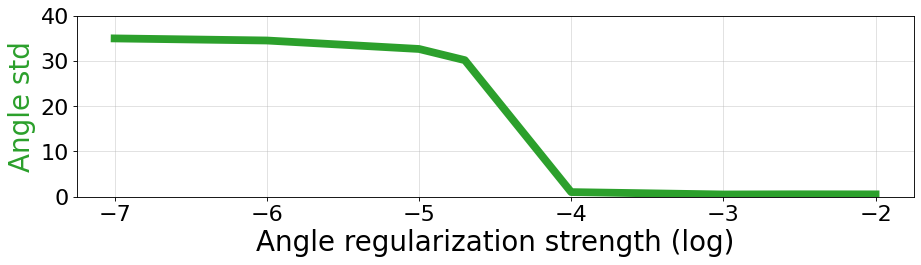

In [17]:
log_reg = np.log10(reg_factors)
Angles_std_graph = np.nanmean(Angles_std['shallow_exp'],axis=-1) 
#Clip extreme overregularized values
log_reg = log_reg[1:]
Angles_std_graph = Angles_std_graph[1:]
plotter.plot_regularization_angles(log_reg, Angles_std_graph, y_min=0, y_max=40, labelsize=20, fontsize=25)